In [1]:
import pandas as pd

In [1]:
!pip install pycaret


In [2]:
import pycaret

In [5]:
%pip install jinja2

Note: you may need to restart the kernel to use updated packages.


In [3]:
from pycaret.regression import *

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

In [4]:
#df = pd.read_csv('Documents\GTA_houses_cleaned_final.csv')
df = pd.read_csv('Documents\GTA_houses_cleaned.csv')

In [5]:
df

,listing image,listing url,full address,city,zipcode,# of beds,# of bathrooms,price,latitude,longitude,home type
0,https://photos.zillowstatic.com/fp/23aacb3df57...,https://www.zillow.com/homedetails/6225-Lawren...,"6225 Lawrence Ave E, Toronto, ON M1C 5G4",Toronto,M1C5G4,3,4,799900,43.655720,-79.457450,SINGLE_FAMILY
1,https://photos.zillowstatic.com/fp/1cd388cbfce...,https://www.zillow.com/homedetails/3840-Bathur...,"3840 Bathurst St #702, Toronto, ON M3H 6C6",Toronto,M3H6C6,2,2,699000,43.623860,-79.488945,CONDO
2,https://photos.zillowstatic.com/fp/1f0037527b3...,https://www.zillow.com/homedetails/8-Littlelea...,"8 Littleleaf Dr, Toronto, ON M1B 1Z1",Toronto,M1B1Z1,3,3,1149900,43.723150,-79.448230,CONDO
3,https://photos.zillowstatic.com/fp/780ba993641...,https://www.zillow.com/homedetails/2301-Danfor...,"2301 Danforth Ave #306, Toronto, ON M4C 0A7",Toronto,M4C0A7,2,2,699000,43.642390,-79.424736,CONDO
4,https://photos.zillowstatic.com/fp/950875d10ea...,https://www.zillow.com/homedetails/16-Catalda-...,"16 Catalda Ct, Toronto, ON M2R 3X5",Toronto,M2R3X5,4,5,2690000,43.641495,-79.410070,CONDO
...,...,...,...,...,...,...,...,...,...,...,...
1888,https://photos.zillowstatic.com/fp/760e52d9c07...,https://www.zillow.com/homedetails/5-Buttermil...,"5 Buttermill Ave #803, Vaughan, ON L4K 4Z4",Vaughan,L4K4Z4,1,1,7580000,43.824554,-79.579860,SINGLE_FAMILY
1889,https://photos.zillowstatic.com/fp/71127d8da58...,https://www.zillow.com/homedetails/127-Vellore...,"127 Vellore Park Ave, Vaughan, ON L4H 4S5",Vaughan,L4H4S5,4,4,7990000,43.890232,-79.477640,SINGLE_FAMILY
1890,https://photos.zillowstatic.com/fp/37fac411136...,https://www.zillow.com/homedetails/173-Sassafr...,"173 Sassafras Cir, Vaughan, ON L4J 8M6",Vaughan,L4J8M6,3,4,7998000,43.848320,-79.623740,SINGLE_FAMILY
1891,https://photos.zillowstatic.com/fp/37a212d5747...,https://www.zillow.com/homedetails/9075-Jane-S...,"9075 Jane St #1904, Vaughan, ON L6A 4H9",Vaughan,L6A4H9,2,2,10500000,43.794030,-79.446880,CONDO


In [6]:
data = df.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = df.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1704, 11)
Unseen Data For Predictions: (189, 11)


In [24]:
exp_reg101 = setup(data = df,
                   target = 'price',
                   ignore_features = ['listing image','listing url','full address','zipcode']) 

,Description,Value
0,Session id,2010
1,Target,price
2,Target type,Regression
3,Data shape,"(1893, 13)"
4,Train data shape,"(1325, 13)"
5,Test data shape,"(568, 13)"
6,Ignore features,4
7,Numeric features,4
8,Categorical features,2
9,Preprocess,True


In [25]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,577023.5241,1162217976189.7852,1054114.4846,0.4241,0.4993,0.7085,0.0870
gbr,Gradient Boosting Regressor,603297.3126,1225457355193.1233,1079852.5851,0.3960,0.5324,0.7645,0.0450
lightgbm,Light Gradient Boosting Machine,627121.9210,1278366253544.4155,1104538.3216,0.3755,0.5705,0.7895,0.0320
et,Extra Trees Regressor,602003.0208,1298594322961.7671,1122417.6275,0.3327,0.5166,0.6709,0.0710
knn,K Neighbors Regressor,673428.3050,1493323479061.0876,1197198.1976,0.2539,0.5517,0.7457,0.0210
lar,Least Angle Regression,792794.9022,1765311350577.4109,1296415.9092,0.1419,0.6542,1.0120,0.0190
lr,Linear Regression,793057.6413,1767527471930.7090,1297246.0488,0.1407,0.6541,0.9846,0.0530
lasso,Lasso Regression,794359.7905,1769471294810.7395,1297956.4813,0.1397,0.6558,1.0004,0.0210
llar,Lasso Least Angle Regression,794331.8922,1769441326522.6411,1297944.6040,0.1397,0.6557,1.0004,0.0190
ridge,Ridge Regression,791452.2834,1768972776610.3828,1298029.8509,0.1391,0.6561,0.9969,0.0180


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

In [27]:
model = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,521047.0890,848104084735.4149,920925.6673,0.3404,0.3962,0.3693
1,583109.5219,821706769454.2987,906480.4297,0.3845,0.4277,0.3741
2,466944.1803,579873657854.6005,761494.3584,0.4768,0.6379,2.4808
3,713379.8395,1952702437225.1467,1397391.2971,0.2746,0.5419,0.5096
4,477953.3980,646454363137.7249,804023.8573,0.5200,0.5282,0.7092
5,629170.9894,1757706332450.8374,1325785.1758,0.3667,0.4630,0.3338
6,556600.9461,986759198066.3878,993357.5379,0.5462,0.4972,0.5528
7,615889.0460,1713647500841.2314,1309063.5969,0.3327,0.6050,0.8871
8,703563.3967,1532727012980.4702,1238033.5266,0.5830,0.4997,0.5077


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [28]:
tuned_gbr = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,508995.8201,755812655969.3948,869374.8650,0.4122,0.4104,0.3979
1,571806.4262,723243180030.5985,850437.0524,0.4583,0.4123,0.3732
2,461939.2501,456436939274.2543,675601.1688,0.5882,0.6497,2.9848
3,677718.9623,1856264006982.5657,1362447.7997,0.3105,0.5258,0.5017
4,501987.9608,809236210596.3260,899575.5725,0.3992,0.5335,0.7212
5,651624.4348,1881183318449.1296,1371562.3640,0.3222,0.4639,0.3359
6,586140.9768,1009462236656.6960,1004719.9792,0.5357,0.4952,0.5678
7,639534.9683,1836830710402.7769,1355297.2775,0.2847,0.6236,0.9617
8,753078.0977,1908166602013.7869,1381364.0367,0.4808,0.5107,0.4938


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


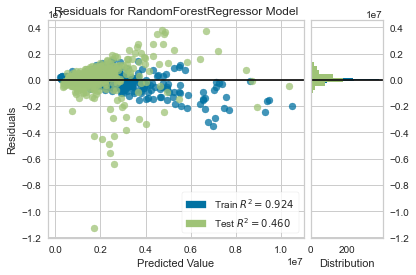

In [29]:
plot_model(tuned_gbr)

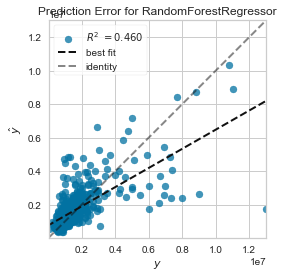

In [30]:
plot_model(tuned_gbr, plot = 'error')

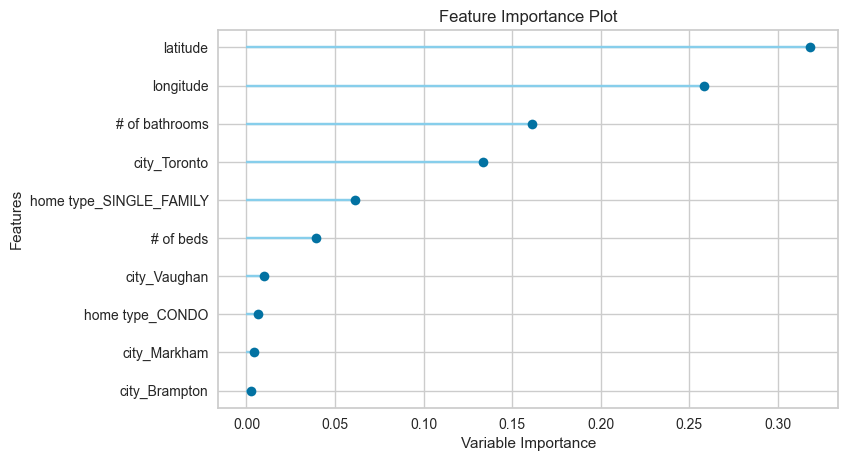

In [31]:
plot_model(tuned_gbr, plot='feature')

In [32]:
evaluate_model(tuned_gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [33]:
unseen_predictions = predict_model(tuned_gbr, data=data_unseen)
unseen_predictions.head()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,403593.1823,655123619585.3572,809397.0716,0.7223,0.2283,0.1534


,city_Toronto,city_Vaughan,city_Brampton,city_Mississauga,city_Markham,# of beds,# of bathrooms,latitude,longitude,home type_CONDO,home type_SINGLE_FAMILY,home type_TOWNHOUSE,price,Label
0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,43.857265,-79.549896,0.0,1.0,0.0,1299900,1603494.30
1,0.0,1.0,0.0,0.0,0.0,4.0,4.0,43.838173,-79.480217,0.0,1.0,0.0,1348000,1632285.00
2,0.0,1.0,0.0,0.0,0.0,5.0,4.0,43.850677,-79.553459,0.0,1.0,0.0,1348800,1764519.83
3,0.0,1.0,0.0,0.0,0.0,4.0,6.0,43.788502,-79.469368,1.0,0.0,0.0,1349000,1271689.82
4,0.0,1.0,0.0,0.0,0.0,2.0,2.0,43.842896,-79.531990,0.0,1.0,0.0,1349000,1646402.68
